In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib.ticker as ticker
import pandas as pd
import helmeos
from glob import glob

In [ ]:
working_directory = '/home/cnchong/Codes/cumc3d/model/Type_Ia/runs/trash/Output_CentralDensity_9.477_AxisRatio_0.699_kappa_0.000E+00_alpha_0.000E+00/outfile/'
profile_directory = '/home/cnchong/Codes/cumc3d/model/Type_Ia/runs/trash/Output_CentralDensity_9.477_AxisRatio_0.699_kappa_0.000E+00_alpha_0.000E+00/profile/'
files = []
for f in glob(working_directory+'/*.hdf5'):
    files.append(f)
n = len(files)-1

gconst = 6.67430e-8
clight = 2.99792458e10
solar = 1.98847e33
lencgs2code = (clight**2)/(solar*gconst)
masscgs2code = (1.0e0/solar)
rhocgs2code = (masscgs2code/lencgs2code**3)
tcgs2code = (clight**3)/(solar*gconst)
mu_0 = 1.25663706212e-6
amp2code = (mu_0*1.0e5*masscgs2code*lencgs2code)**(0.5e0)/tcgs2code
gauss2code = 1.0e-1*masscgs2code/amp2code/tcgs2code**2
energycgs2code = (1.0E0/clight**2)
me2 = 9.1093837015e-28*masscgs2code
mb2 = 1.66053906660e-24*masscgs2code
ye = 0.5e0
h_bar = (1.054571817e-27)*(lencgs2code**2*masscgs2code/tcgs2code)
amax = (me2**4)/(2.4e1*np.pi**2*h_bar**3)
bmax = (mb2*me2**3)/(3.0e0*np.pi**2*h_bar**3*ye)
print('Number of files are', n)

Number of files are 99


In [3]:
irho = 0
ivx = 1
ivy = 2
ivz = 3
itau = 4
iturbq = 5
ihe4 = 6
ic12 = 7
io16 = 8
ine20 = 9
img24 = 10
isi28 = 11
ini56 = 12
iye2 = 13
iscaG1 = 14
iscaG2 = 15

In [4]:
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [5]:
# Read file
filename = working_directory+"/rkiter-"+str(0)+"-nm.hdf5"
f0 = h5py.File(filename, "r")
f0.keys()
primitive = f0['primitive'][:].T
bfields = f0['bfield'][:].T
initial_rho = primitive[0,1:-1,1,1:-1]

# Face value
x1f = np.loadtxt(profile_directory+'/hydro_x1_fgrid.dat').T
x3f = np.loadtxt(profile_directory+'/hydro_x3_fgrid.dat').T
# Center value
x1f = x1f [3:-3]*lencgs2code # Remove BC
x1c = (x1f[1:]+x1f[:-1])/2 #mid pt
x3f = x3f[3:-3]*lencgs2code # Remove BC
x3c = (x3f[1:]+x3f[:-1])/2 #mid pt

xx,yy= np.meshgrid(x1c,x3c,indexing='ij')

xxf, yyf = np.meshgrid(x1f,x3f,indexing='ij')

dx = np.diff(x1f)[0]
# dx2 = np.diff(xxf[:,0]**2)
# dy = np.diff(yyf[0,:])
# dxx2,dyy = np.meshgrid(dx2,dy,indexing='ij')
# vol = dxx2*dyy*np.pi

vol = (f0['vol'][:].T)[:,0,:]

In [6]:
mass0 = np.sum(initial_rho*vol)
print(mass0)

1.362273171212286


In [7]:
masses = []
ni_masses = []
for t in range(n):
    filename = working_directory+"/rkiter-"+str(t)+"-nm.hdf5"
    f = h5py.File(filename, "r")
    primitive = f['primitive'][:]
    primitive = primitive.T
    dens = primitive[0,1:-1,1,1:-1]
    masses.append(np.sum(dens*vol))
    ni_masses.append(np.sum(dens*primitive[ini56,1:-1,1,1:-1]*vol))

In [8]:
t = np.argwhere(np.abs((np.array(masses)-mass0))>1e-4)[0][0]

Text(0, 0.5, 'Ni $(M_\\odot)$')

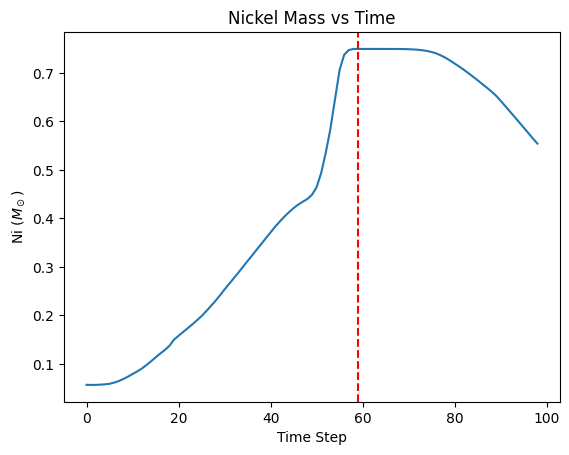

In [9]:
plt.plot(ni_masses)
plt.axvline(x=t, linestyle='dashed', color = 'red')
plt.title('Nickel Mass vs Time')
plt.xlabel('Time Step')
plt.ylabel(r'Ni $(M_\odot)$')

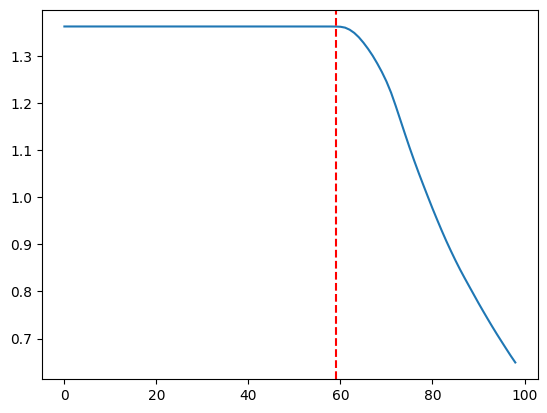

In [10]:
plt.plot(masses)
plt.axvline(x=t, linestyle='dashed', color = 'red')

In [11]:
mass0

1.362273171212286

1.3620887363021987
0.7496099345966895


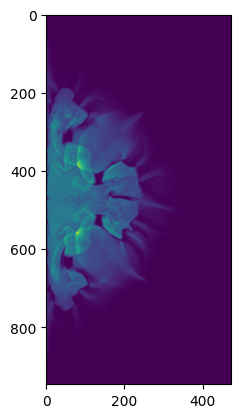

In [12]:
filename = working_directory+"/rkiter-"+str(t)+"-nm.hdf5"
f = h5py.File(filename, "r")
primitive = f['primitive'][:]
primitive = primitive.T
dens = primitive[0,1:-1,1,1:-1]
print(masses[t])
print(np.sum(dens*primitive[ini56,1:-1,1,1:-1]*vol))
plt.imshow((dens*primitive[ini56,1:-1,1,1:-1]).T)